# PreProcess Data

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

In [42]:
from keras.datasets import cifar10, mnist, fashion_mnist

(cifar10_x_train, cifar10_y_train), (cifar10_x_test, cifar10_y_test) = cifar10.load_data()
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()
(fashion_mnist_x_train, fashion_mnist_y_train), (fashion_mnist_x_test, fashion_mnist_y_test) = fashion_mnist.load_data()

In [43]:
# expand dimenstion from (28,28) to (28,28,1)
mnist_x_train, mnist_x_test = np.expand_dims(mnist_x_train, -1), np.expand_dims(mnist_x_test, -1)
fashion_mnist_x_train, fashion_mnist_x_test = np.expand_dims(fashion_mnist_x_train, -1), np.expand_dims(fashion_mnist_x_test, -1)

In [29]:
print(f"cifar10 train shape {cifar10_x_train.shape } & test shape {cifar10_x_test.shape}")
print(f"mnist train shape {mnist_x_train.shape } & test shape {mnist_x_test.shape}")
print(f"fashion_mnist train shape {fashion_mnist_x_train.shape } & test shape {fashion_mnist_x_test.shape}")

cifar10 train shape (50000, 32, 32, 3) & test shape (10000, 32, 32, 3)
mnist train shape (60000, 28, 28, 1) & test shape (10000, 28, 28, 1)
fashion_mnist train shape (60000, 28, 28, 1) & test shape (10000, 28, 28, 1)


## Show Samples (Cifar10, Mnist, Fashion Mnist)

In [9]:
def show_samples(x, labels, class_names):
  np.random.seed(5)
  cnt = 1
  plt.figure(figsize=(5, 5))
  random_image_indexes = np.random.choice(range(len(x)), 16)
  for i in random_image_indexes:
      plt.subplot(4, 4, cnt)
      plt.imshow(x[i])
      try:
        plt.title(class_names[labels[i, 0]])
      except:
        plt.title(class_names[labels[i]])
      plt.xticks([])
      plt.yticks([])
      cnt += 1
  plt.tight_layout()
  plt.show()

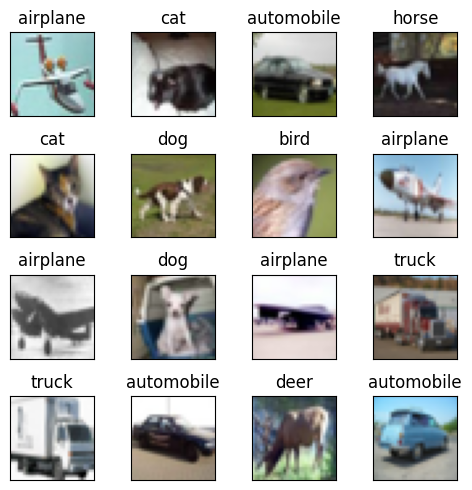

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
show_samples(cifar10_x_train, cifar10_y_train, class_names)

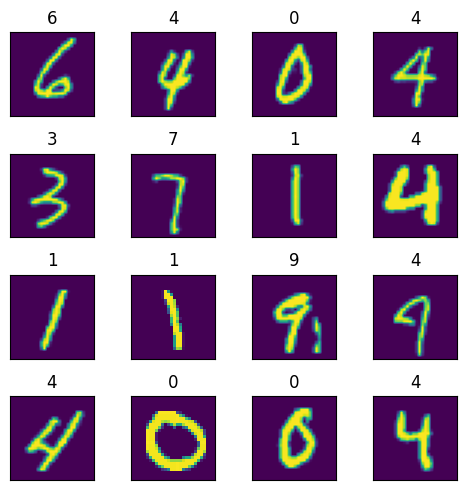

In [21]:
class_names = [str(i) for i in range(10)]
show_samples(mnist_x_train, mnist_y_train, class_names)

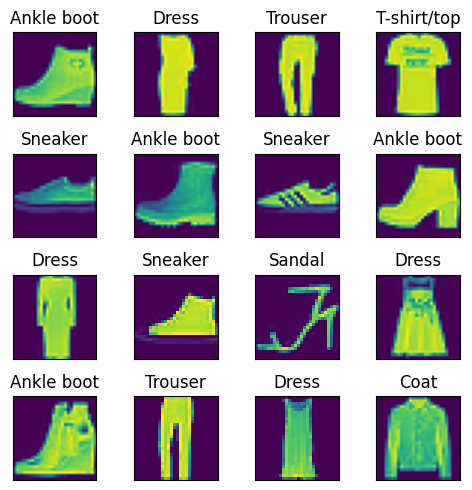

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
show_samples(fashion_mnist_x_train, fashion_mnist_y_train, class_names)

In [44]:
mnist_x_train, mnist_x_test = tf.image.random_flip_left_right(mnist_x_train).numpy(), tf.image.random_flip_left_right(mnist_x_test).numpy()
fashion_mnist_x_train, fashion_mnist_x_test = tf.image.random_flip_left_right(fashion_mnist_x_train).numpy(), tf.image.random_flip_left_right(fashion_mnist_x_test).numpy()

## Normalize Data

In [45]:
def normalize_data(train, test):
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 
 return train_norm, test_norm

In [46]:
# normalize to range [0,1]
cifar10_x_train_norm, cifar10_x_test_norm = normalize_data(cifar10_x_train, cifar10_x_test)
mnist_x_train_norm, mnist_x_test_norm = normalize_data(mnist_x_train, mnist_x_test)
fashion_mnist_x_train_norm, fashion_mnist_x_test_norm = normalize_data(fashion_mnist_x_train, fashion_mnist_x_test)

In [47]:
cifar10_y_train_onehot, cifar10_y_test_onehot = keras.utils.to_categorical(cifar10_y_train, 10), keras.utils.to_categorical(cifar10_y_test, 10)
mnist_y_train_onehot, mnist_y_test_onehot = keras.utils.to_categorical(mnist_y_train, 10), keras.utils.to_categorical(mnist_y_test, 10)
fashion_mnist_y_train_onehot, fashion_mnist_y_test_onehot = keras.utils.to_categorical(fashion_mnist_y_train, 10), keras.utils.to_categorical(fashion_mnist_y_test, 10)

## Define Models (SCNNB, SCNNB-a, SCNNB-b)

In [48]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Activation,Input,Flatten,BatchNormalization,MaxPooling2D
from keras.optimizers import Adam
from keras.regularizers import l2
import tensorflow as tf

In [49]:
# hyper parameters

EPOCHS = 150
BATCH_SIZE = 128
regularization_w = 0.000005
opt = tf.keras.optimizers.legacy.SGD(learning_rate=0.02, momentum=0.9, decay=regularization_w)
loss = 'categorical_crossentropy'

In [50]:
def scnnb_model(input_shape):
  model = Sequential()
  model.add(Conv2D(32 , (3,3) , input_shape = input_shape))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64 , (3,3)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2 , 2)))

  model.add(Flatten())
  model.add(Dense(1280))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))


  model.add(Dense(10))
  model.add(Activation('Softmax'))

  return model

In [51]:
def scnnb_a_model(input_shape):
  model = Sequential()
  model.add(Conv2D(32 , (3,3) , input_shape = input_shape))
  # model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64 , (3,3)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2 , 2)))

  model.add(Flatten())
  model.add(Dense(1280))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))


  model.add(Dense(10))
  model.add(Activation('Softmax'))

  return model

In [52]:
def scnnb_b_model(input_shape):
  model = Sequential()
  model.add(Conv2D(32 , (3,3) , input_shape = input_shape))
  # model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64 , (3,3)))
  # model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2 , 2)))

  model.add(Flatten())
  model.add(Dense(1280))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))


  model.add(Dense(10))
  model.add(Activation('Softmax'))

  return model

In [53]:
cifar10_scnnb_model = scnnb_model((32,32,3))
cifar10_scnnb_model.compile(loss = loss, optimizer = opt, metrics = ['accuracy'])
cifar10_scnnb_a_model = scnnb_a_model((32,32,3))
cifar10_scnnb_a_model.compile(loss = loss, optimizer = opt, metrics = ['accuracy'])
cifar10_scnnb_b_model = scnnb_b_model((32,32,3))
cifar10_scnnb_b_model.compile(loss = loss, optimizer = opt, metrics = ['accuracy'])

mnist_scnnb_model = scnnb_model((28,28,1))
mnist_scnnb_model.compile(loss = loss, optimizer = opt, metrics = ['accuracy'])
mnist_scnnb_a_model = scnnb_a_model((28,28,1))
mnist_scnnb_a_model.compile(loss = loss, optimizer = opt, metrics = ['accuracy'])
mnist_scnnb_b_model = scnnb_b_model((28,28,1))
mnist_scnnb_b_model.compile(loss = loss, optimizer = opt, metrics = ['accuracy'])

fashion_mnist_scnnb_model = scnnb_model((28,28,1))
fashion_mnist_scnnb_model.compile(loss = loss, optimizer = opt, metrics = ['accuracy'])
fashion_mnist_scnnb_a_model = scnnb_a_model((28,28,1))
fashion_mnist_scnnb_a_model.compile(loss = loss, optimizer = opt, metrics = ['accuracy'])
fashion_mnist_scnnb_b_model = scnnb_b_model((28,28,1))
fashion_mnist_scnnb_b_model.compile(loss = loss, optimizer = opt, metrics = ['accuracy'])

In [63]:
cifar10_scnnb_history = cifar10_scnnb_model.fit(cifar10_x_train_norm, cifar10_y_train_onehot, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(cifar10_x_test_norm, cifar10_y_test_onehot))

Epoch 1/150
391/391 [==============================] - 5s 11ms/step - loss: 1.5144 - accuracy: 0.4591 - val_loss: 2.0982 - val_accuracy: 0.3030
Epoch 2/150
391/391 [==============================] - 3s 8ms/step - loss: 1.1586 - accuracy: 0.5884 - val_loss: 1.1575 - val_accuracy: 0.5960
Epoch 3/150
391/391 [==============================] - 3s 8ms/step - loss: 1.0133 - accuracy: 0.6424 - val_loss: 0.9819 - val_accuracy: 0.6552
Epoch 4/150
391/391 [==============================] - 3s 8ms/step - loss: 0.9028 - accuracy: 0.6848 - val_loss: 1.0057 - val_accuracy: 0.6496
Epoch 5/150
391/391 [==============================] - 3s 9ms/step - loss: 0.8281 - accuracy: 0.7104 - val_loss: 0.9840 - val_accuracy: 0.6570
Epoch 6/150
391/391 [==============================] - 3s 8ms/step - loss: 0.7597 - accuracy: 0.7334 - val_loss: 1.5899 - val_accuracy: 0.5375
Epoch 7/150
391/391 [==============================] - 3s 8ms/step - loss: 0.7027 - accuracy: 0.7522 - val_loss: 0.8649 - val_accuracy: 0.699

In [64]:
cifar10_scnnb_a_history = cifar10_scnnb_a_model.fit(cifar10_x_train_norm, cifar10_y_train_onehot, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(cifar10_x_test_norm, cifar10_y_test_onehot))

Epoch 1/150
391/391 [==============================] - 4s 8ms/step - loss: 1.5309 - accuracy: 0.4503 - val_loss: 1.6649 - val_accuracy: 0.4542
Epoch 2/150
391/391 [==============================] - 3s 7ms/step - loss: 1.1914 - accuracy: 0.5762 - val_loss: 1.2263 - val_accuracy: 0.5713
Epoch 3/150
391/391 [==============================] - 3s 7ms/step - loss: 1.0413 - accuracy: 0.6324 - val_loss: 1.1385 - val_accuracy: 0.5982
Epoch 4/150
391/391 [==============================] - 3s 7ms/step - loss: 0.9448 - accuracy: 0.6685 - val_loss: 1.2443 - val_accuracy: 0.5814
Epoch 5/150
391/391 [==============================] - 3s 7ms/step - loss: 0.8586 - accuracy: 0.6999 - val_loss: 0.8676 - val_accuracy: 0.7044
Epoch 6/150
391/391 [==============================] - 3s 7ms/step - loss: 0.7926 - accuracy: 0.7228 - val_loss: 0.9161 - val_accuracy: 0.6854
Epoch 7/150
391/391 [==============================] - 3s 7ms/step - loss: 0.7281 - accuracy: 0.7449 - val_loss: 0.8466 - val_accuracy: 0.7067

In [65]:
cifar10_scnnb_b_history = cifar10_scnnb_b_model.fit(cifar10_x_train_norm, cifar10_y_train_onehot, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(cifar10_x_test_norm, cifar10_y_test_onehot))

Epoch 1/150
391/391 [==============================] - 3s 8ms/step - loss: 1.9513 - accuracy: 0.2882 - val_loss: 1.6085 - val_accuracy: 0.4370
Epoch 2/150
391/391 [==============================] - 3s 7ms/step - loss: 1.5398 - accuracy: 0.4453 - val_loss: 1.4700 - val_accuracy: 0.4799
Epoch 3/150
391/391 [==============================] - 3s 7ms/step - loss: 1.3932 - accuracy: 0.5027 - val_loss: 1.3549 - val_accuracy: 0.5195
Epoch 4/150
391/391 [==============================] - 3s 7ms/step - loss: 1.3013 - accuracy: 0.5375 - val_loss: 1.2484 - val_accuracy: 0.5615
Epoch 5/150
391/391 [==============================] - 3s 7ms/step - loss: 1.2137 - accuracy: 0.5699 - val_loss: 1.1495 - val_accuracy: 0.5982
Epoch 6/150
391/391 [==============================] - 3s 6ms/step - loss: 1.1449 - accuracy: 0.5984 - val_loss: 1.1092 - val_accuracy: 0.6189
Epoch 7/150
391/391 [==============================] - 3s 7ms/step - loss: 1.0742 - accuracy: 0.6244 - val_loss: 1.0541 - val_accuracy: 0.6361

In [54]:
mnist_scnnb_history = mnist_scnnb_model.fit(mnist_x_train_norm, mnist_y_train_onehot, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(mnist_x_test_norm, mnist_y_test_onehot))

Epoch 1/150
469/469 [==============================] - 16s 10ms/step - loss: 0.2853 - accuracy: 0.9111 - val_loss: 0.1168 - val_accuracy: 0.9645
Epoch 2/150
469/469 [==============================] - 3s 6ms/step - loss: 0.1016 - accuracy: 0.9688 - val_loss: 0.0803 - val_accuracy: 0.9732
Epoch 3/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0763 - accuracy: 0.9751 - val_loss: 0.0524 - val_accuracy: 0.9816
Epoch 4/150
469/469 [==============================] - 4s 8ms/step - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.0538 - val_accuracy: 0.9813
Epoch 5/150
469/469 [==============================] - 3s 7ms/step - loss: 0.0502 - accuracy: 0.9842 - val_loss: 0.0404 - val_accuracy: 0.9865
Epoch 6/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0419 - accuracy: 0.9863 - val_loss: 0.0416 - val_accuracy: 0.9856
Epoch 7/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0372 - accuracy: 0.9884 - val_loss: 0.0687 - val_accuracy: 0.97

In [55]:
mnist_scnnb_a_history = mnist_scnnb_a_model.fit(mnist_x_train_norm, mnist_y_train_onehot, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(mnist_x_test_norm, mnist_y_test_onehot))

Epoch 1/150
469/469 [==============================] - 3s 6ms/step - loss: 0.2771 - accuracy: 0.9134 - val_loss: 0.1583 - val_accuracy: 0.9553
Epoch 2/150
469/469 [==============================] - 3s 5ms/step - loss: 0.0992 - accuracy: 0.9690 - val_loss: 0.0660 - val_accuracy: 0.9777
Epoch 3/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0709 - accuracy: 0.9777 - val_loss: 0.0515 - val_accuracy: 0.9821
Epoch 4/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0571 - accuracy: 0.9819 - val_loss: 0.0460 - val_accuracy: 0.9838
Epoch 5/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0469 - accuracy: 0.9843 - val_loss: 0.0460 - val_accuracy: 0.9840
Epoch 6/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0419 - accuracy: 0.9867 - val_loss: 0.0400 - val_accuracy: 0.9860
Epoch 7/150
469/469 [==============================] - 3s 5ms/step - loss: 0.0367 - accuracy: 0.9882 - val_loss: 0.0408 - val_accuracy: 0.9870

In [56]:
mnist_scnnb_b_history = mnist_scnnb_b_model.fit(mnist_x_train_norm, mnist_y_train_onehot, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(mnist_x_test_norm, mnist_y_test_onehot))

Epoch 1/150
469/469 [==============================] - 3s 6ms/step - loss: 0.5245 - accuracy: 0.8296 - val_loss: 0.1476 - val_accuracy: 0.9552
Epoch 2/150
469/469 [==============================] - 2s 5ms/step - loss: 0.1714 - accuracy: 0.9457 - val_loss: 0.1115 - val_accuracy: 0.9642
Epoch 3/150
469/469 [==============================] - 3s 6ms/step - loss: 0.1242 - accuracy: 0.9610 - val_loss: 0.0850 - val_accuracy: 0.9732
Epoch 4/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0998 - accuracy: 0.9684 - val_loss: 0.0674 - val_accuracy: 0.9769
Epoch 5/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0810 - accuracy: 0.9747 - val_loss: 0.0634 - val_accuracy: 0.9784
Epoch 6/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0684 - accuracy: 0.9781 - val_loss: 0.0560 - val_accuracy: 0.9816
Epoch 7/150
469/469 [==============================] - 3s 5ms/step - loss: 0.0577 - accuracy: 0.9816 - val_loss: 0.0532 - val_accuracy: 0.9825

In [57]:
fashion_mnist_scnnb_history = fashion_mnist_scnnb_model.fit(fashion_mnist_x_train_norm, fashion_mnist_y_train_onehot, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(fashion_mnist_x_test_norm, fashion_mnist_y_test_onehot))

Epoch 1/150
469/469 [==============================] - 4s 7ms/step - loss: 0.5160 - accuracy: 0.8131 - val_loss: 0.4237 - val_accuracy: 0.8499
Epoch 2/150
469/469 [==============================] - 3s 6ms/step - loss: 0.3572 - accuracy: 0.8696 - val_loss: 0.3547 - val_accuracy: 0.8681
Epoch 3/150
469/469 [==============================] - 3s 7ms/step - loss: 0.3127 - accuracy: 0.8831 - val_loss: 0.3087 - val_accuracy: 0.8862
Epoch 4/150
469/469 [==============================] - 3s 6ms/step - loss: 0.2861 - accuracy: 0.8955 - val_loss: 0.3064 - val_accuracy: 0.8852
Epoch 5/150
469/469 [==============================] - 3s 6ms/step - loss: 0.2646 - accuracy: 0.9029 - val_loss: 0.2879 - val_accuracy: 0.8952
Epoch 6/150
469/469 [==============================] - 3s 6ms/step - loss: 0.2523 - accuracy: 0.9067 - val_loss: 0.2963 - val_accuracy: 0.8897
Epoch 7/150
469/469 [==============================] - 3s 7ms/step - loss: 0.2337 - accuracy: 0.9135 - val_loss: 0.2789 - val_accuracy: 0.8968

In [58]:
fashion_mnist_scnnb_a_history = fashion_mnist_scnnb_a_model.fit(fashion_mnist_x_train_norm, fashion_mnist_y_train_onehot, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(fashion_mnist_x_test_norm, fashion_mnist_y_test_onehot))

Epoch 1/150
469/469 [==============================] - 4s 6ms/step - loss: 0.5286 - accuracy: 0.8105 - val_loss: 0.4726 - val_accuracy: 0.8620
Epoch 2/150
469/469 [==============================] - 3s 6ms/step - loss: 0.3567 - accuracy: 0.8689 - val_loss: 0.3316 - val_accuracy: 0.8771
Epoch 3/150
469/469 [==============================] - 2s 5ms/step - loss: 0.3149 - accuracy: 0.8845 - val_loss: 0.3133 - val_accuracy: 0.8833
Epoch 4/150
469/469 [==============================] - 3s 6ms/step - loss: 0.2898 - accuracy: 0.8932 - val_loss: 0.2955 - val_accuracy: 0.8902
Epoch 5/150
469/469 [==============================] - 3s 6ms/step - loss: 0.2680 - accuracy: 0.9006 - val_loss: 0.3144 - val_accuracy: 0.8817
Epoch 6/150
469/469 [==============================] - 3s 5ms/step - loss: 0.2538 - accuracy: 0.9054 - val_loss: 0.2784 - val_accuracy: 0.8969
Epoch 7/150
469/469 [==============================] - 3s 6ms/step - loss: 0.2393 - accuracy: 0.9120 - val_loss: 0.3101 - val_accuracy: 0.8871

In [59]:
fashion_mnist_scnnb_b_history = fashion_mnist_scnnb_b_model.fit(fashion_mnist_x_train_norm, fashion_mnist_y_train_onehot, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(fashion_mnist_x_test_norm, fashion_mnist_y_test_onehot))

Epoch 1/150
469/469 [==============================] - 3s 6ms/step - loss: 0.8800 - accuracy: 0.6800 - val_loss: 0.5489 - val_accuracy: 0.7982
Epoch 2/150
469/469 [==============================] - 2s 5ms/step - loss: 0.5208 - accuracy: 0.8061 - val_loss: 0.4612 - val_accuracy: 0.8310
Epoch 3/150
469/469 [==============================] - 2s 5ms/step - loss: 0.4548 - accuracy: 0.8322 - val_loss: 0.4377 - val_accuracy: 0.8383
Epoch 4/150
469/469 [==============================] - 3s 6ms/step - loss: 0.4161 - accuracy: 0.8474 - val_loss: 0.3937 - val_accuracy: 0.8545
Epoch 5/150
469/469 [==============================] - 3s 6ms/step - loss: 0.3856 - accuracy: 0.8592 - val_loss: 0.3842 - val_accuracy: 0.8599
Epoch 6/150
469/469 [==============================] - 2s 5ms/step - loss: 0.3677 - accuracy: 0.8655 - val_loss: 0.3557 - val_accuracy: 0.8717
Epoch 7/150
469/469 [==============================] - 2s 5ms/step - loss: 0.3463 - accuracy: 0.8733 - val_loss: 0.3510 - val_accuracy: 0.8712

In [60]:
def plot_loss_accuracy(history):
    plt.figure(figsize=(9, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(EPOCHS), history.history['loss'], label='train_loss')
    plt.plot(range(EPOCHS), history.history['val_loss'], label='test_loss')
    plt.title('Train & Test Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title('Train & Test Accuracy')
    plt.plot(range(EPOCHS), history.history['accuracy'], label='train_accuracy')
    plt.plot(range(EPOCHS), history.history['val_accuracy'], label='test_accuracy')
    plt.legend()
    plt.show()

In [61]:
def plot_dataset_detailed_history(histories, labels=('scnnb', 'scnnb-a', 'scnnb-b')):
    plt.figure(figsize=(9, 9))

    plt.subplot(2, 2, 1)
    plt.title('Train Accuracy')
    for i, history in enumerate(histories):
      plt.plot(range(EPOCHS), history.history['accuracy'], label=labels[i])
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.title('Test Accuracy')
    for i, history in enumerate(histories):
      plt.plot(range(EPOCHS), history.history['val_accuracy'], label=labels[i])
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.title('Train loss')
    for i, history in enumerate(histories):
      plt.plot(range(EPOCHS), history.history['loss'], label=labels[i])
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.title('Test loss')
    for i, history in enumerate(histories):
      plt.plot(range(EPOCHS), history.history['val_loss'], label=labels[i])
    plt.legend()

    plt.show()

In [66]:
cifar10_histories = [cifar10_scnnb_history, cifar10_scnnb_a_history, cifar10_scnnb_b_history]
mnist_histories = [mnist_scnnb_history, mnist_scnnb_a_history, mnist_scnnb_b_history]
fashion_mnist_histories = [fashion_mnist_scnnb_history, fashion_mnist_scnnb_a_history, fashion_mnist_scnnb_b_history]

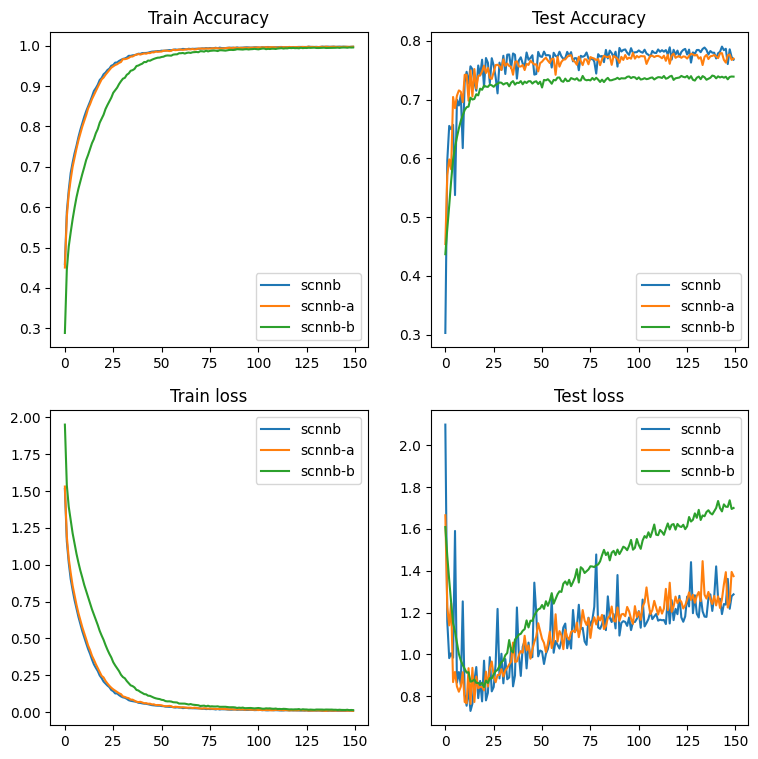

In [67]:
plot_dataset_detailed_history(cifar10_histories)

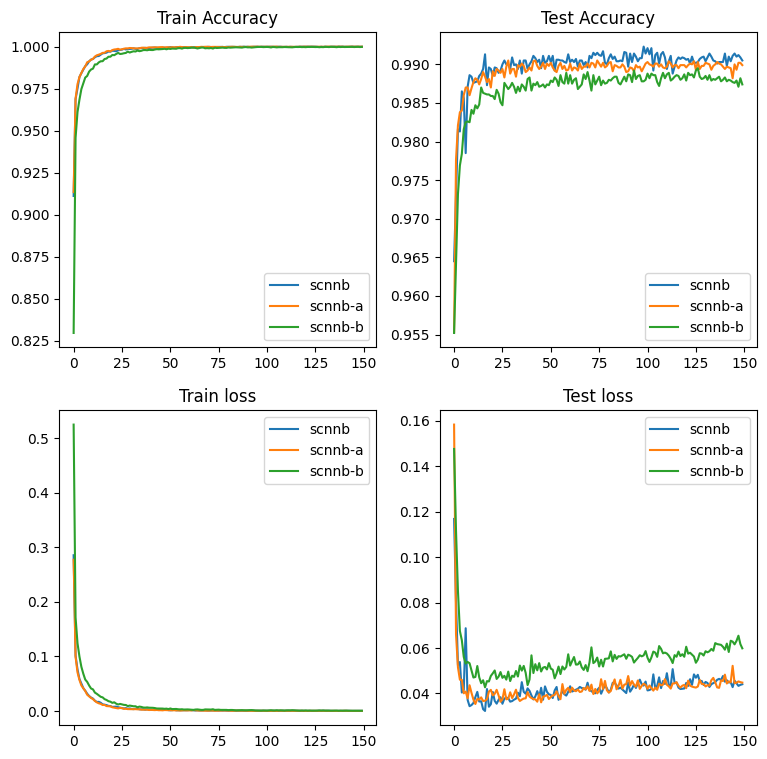

In [68]:
plot_dataset_detailed_history(mnist_histories)

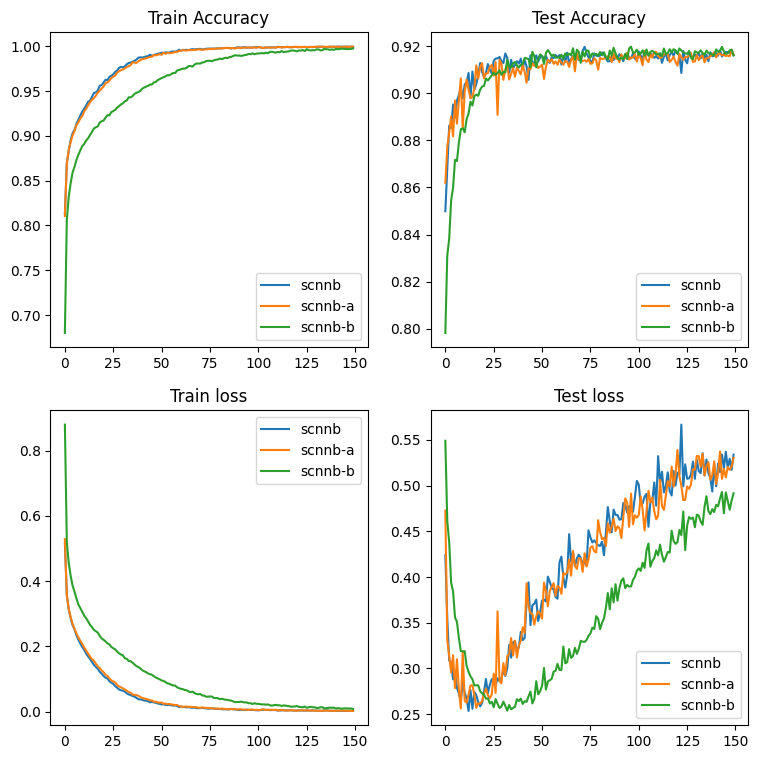

In [69]:
plot_dataset_detailed_history(fashion_mnist_histories)